In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 602.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c5b5bd434845a3b41cf68e35e4e872db60007155091e181f8bbc805a7c3bc553
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.3 MB/s eta 0:00:00


# Step-by-Step Instruction for BB84 QKD Lab

# Step 1: Imports


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

simulator = AerSimulator()


# Step 2: Generate Random Bits and Bases
Alice and Bob must independently generate two random sequences:

**Bits (0 or 1)** – the values Alice wants to transmit.

**Bases (Z-basis or X-basis)** – how they encode or measure qubits.

Alice’s bases define how she prepares each qubit; Bob’s bases define how he measures them.

In [ ]:
def generate_bits_and_bases(n):
    bits = np.___
    bases = np.___
    return bits, bases


# Step 3: Encode Alice’s Qubits

Purpose:
Alice prepares a qubit for each bit using:

**Z-basis (basis = 0)**: |0⟩ for bit 0, |1⟩ for bit 1

**X-basis (basis = 1)**: |+⟩ for bit 0, |–⟩ for bit 1 (by applying Hadamard)

Each qubit becomes a single-qubit circuit.



In [ ]:
def encode_qubits(bits, bases):
    circuits = []
    for bit, basis in zip(_, _):
        qc = QuantumCircuit(_, _)
        if _ == _:
            qc.x(_)
        if _ == _:
            qc.h(_)
        circuits.append(_)
    return circuits


# Step 4: Simulate Eavesdropping by Eve

We simulate an attacker, Eve, who:

1. Intercepts Alice’s qubit.

2. Measures it in a randomly chosen basis.

3. Re-prepares the qubit based on her measurement result.

4. Sends the re-encoded qubit to Bob.

If Eve picks the wrong basis, she introduces errors—this is the core of QKD security.

In [ ]:
def eavesdrop(circuits, eaves_bases):
    new_circuits = []
    for qc, basis in zip(_, _):
        temp_qc = qc.copy()
        if basis == _:
            _.h(_)
        _.measure(_, _)

        tqc = transpile(_, simulator)
        result = simulator.run(tqc, shots=1, memory=True).result()
        measurement = result.get_memory()[0]

        resend = QuantumCircuit(_, _)
        if int(measurement) == _:
            _.x(_)
        if basis == _:
            _.h(_)
        new_circuits.append(_)
    return new_circuits


# Step 5: Bob Measures the Qubits

Bob applies a Hadamard if his basis is X, then measures the qubit in the Z-basis.

This simulates Bob’s choice of measurement basis. His result will match Alice's bit only if their bases agree.



In [ ]:
def measure_qubits(circuits, bob_bases):
    results = []
    for qc, basis in zip(_, _):
        temp_qc = qc.copy()
        if basis == _:
            #### Your Code here (temp_qc and hadamard)

        _.measure(_, _)
        tqc = transpile(temp_qc, simulator)
        result = simulator.run(_, shots=1, memory=True).result()
        results.append(int(result.get_memory()[0]))
    return results


# Step 6: Key Sifting (Basis Reconciliation)

Once Alice and Bob reveal their bases publicly, they discard all bits where their bases don’t match.

This step:

* Keeps only measurements where they both used the same basis.

* Produces a sifted key from Alice and Bob.

The sifted keys are not guaranteed to match—if Eve was eavesdropping, some bits will differ.

In [ ]:
def sift_key(alice_bases, bob_bases, alice_bits, bob_results):
    sifted_alice = []
    sifted_bob = []
    for ab, bb, ab_bit, br in zip(_, _, _, _):
        if _ == _:
            sifted_alice.append(_)
            sifted_bob.append(_)
    return sifted_alice, sifted_bob


# Step 7: Estimate the Quantum Bit Error Rate (QBER)

To evaluate the security of the key:

* We compare Alice and Bob’s sifted keys.

* The QBER is the fraction of mismatched bits.

* A high QBER suggests interference (e.g., Eve is present).

In a secure transmission without noise or Eve, the error rate should be close to 0.

In [ ]:
def estimate_error_rate(sifted_alice, sifted_bob):
    if not _:
        return 0
    errors = sum(a != b for a, b in zip(_, _))
    return errors / len(_)


# Step 8: Plotting the QBER


In [ ]:
import matplotlib.pyplot as plt

def plot_qber_vs_eavesdropping():
    trials = 10
    n = 100
    qber_no_eve = []
    qber_with_eve = []

    for _ in range(trials):
        # No Eve
        alice_bits, alice_bases = generate_bits_and_bases(n)
        bob_bases = generate_bits_and_bases(n)[1]
        circuits = encode_qubits(alice_bits, alice_bases)
        bob_results = measure_qubits(circuits, bob_bases)
        sifted_alice, sifted_bob = sift_key(alice_bases, bob_bases, alice_bits, bob_results)
        qber_no_eve.append(estimate_error_rate(sifted_alice, sifted_bob))

        # With Eve
        alice_bits, alice_bases = generate_bits_and_bases(n)
        bob_bases = generate_bits_and_bases(n)[1]
        eaves_bases = generate_bits_and_bases(n)[1]
        circuits = encode_qubits(alice_bits, alice_bases)
        circuits = eavesdrop(circuits, eaves_bases)
        bob_results = measure_qubits(circuits, bob_bases)
        sifted_alice, sifted_bob = sift_key(alice_bases, bob_bases, alice_bits, bob_results)
        qber_with_eve.append(estimate_error_rate(sifted_alice, sifted_bob))

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(qber_no_eve, label='No Eve (Secure Channel)', marker='o')
    plt.plot(qber_with_eve, label='With Eve (Intercepted)', marker='x')
    plt.axhline(y=0.25, color='gray', linestyle='--', label='Random Guessing Error (25%)')
    plt.xlabel('Trial')
    plt.ylabel('Quantum Bit Error Rate (QBER)')
    plt.title('QBER With vs. Without Eavesdropping in BB84')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The following block ties all the steps together:

1. Alice generates bits + bases.

2. Bob and Eve (optional) generate their bases.

3. Alice encodes qubits.

4. Eve intercepts.

5. Bob measures.

6. Alice and Bob compare bases and compute their sifted key.

7. They estimate how many bits differ to check for eavesdropping.


Sifted key length: 50
Estimated error rate: 0.32
Sifted Alice Key: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
Sifted Bob Key:   [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]


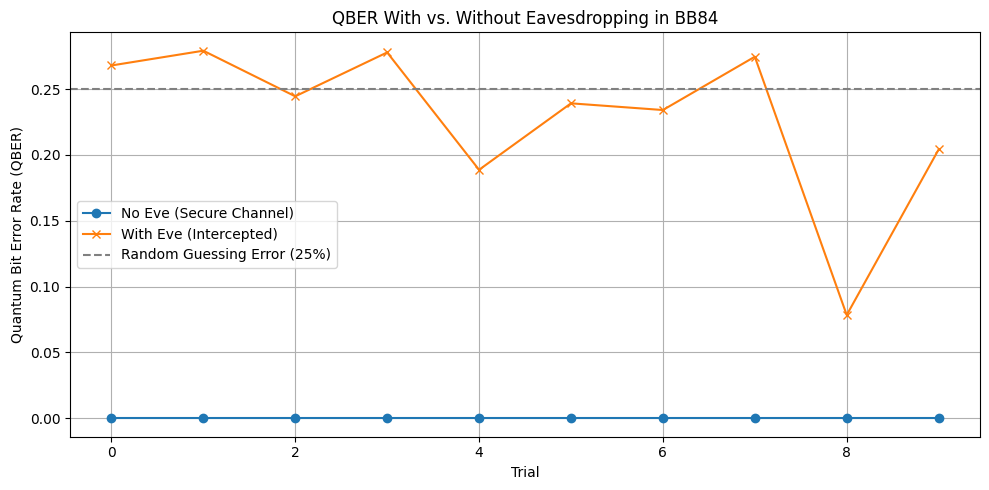

In [ ]:
if __name__ == "__main__":
    n = 100
    alice_bits, alice_bases = generate_bits_and_bases(n)
    bob_bases = generate_bits_and_bases(n)[1]
    eaves_bases = generate_bits_and_bases(n)[1]

    circuits = encode_qubits(alice_bits, alice_bases)

    # Uncomment this line to simulate eavesdropping
    circuits = eavesdrop(circuits, eaves_bases)

    bob_results = measure_qubits(circuits, bob_bases)

    sifted_alice, sifted_bob = sift_key(alice_bases, bob_bases, alice_bits, bob_results)
    error = estimate_error_rate(sifted_alice, sifted_bob)

    print("Sifted key length:", len(sifted_alice))
    print("Estimated error rate:", error)
    print("Sifted Alice Key:", sifted_alice)
    print("Sifted Bob Key:  ", sifted_bob)
    plot_qber_vs_eavesdropping() ### This line could take a while!



# Question:
Which part of the diagram is weird to you? (or not!)